# Final Project for BTT

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# File names of the four data sets
#adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
#airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
#WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
#bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
bankData_filename = os.path.join(os.getcwd(), "data", "bank-additional-full.csv")

df = pd.read_csv(bankData_filename, delimiter = ';', header = 0)

df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


For this project, I have the freedom to create any model of my choosing. I plan to utilize a dataset from a marketing campaign performed by a Portuguese banking institution, rather than the pre-loaded datasets we are given. This dataset includes various features of each bank client, including demographic information like age and marital status, as well as information about previous campaigns with the client or spending information. For this project, I will be creating a model that predicts if clients will subscribe a term deposit of the bank, dependent on the various features included - the label in the raw data is "y." This is a supervised learning and binary classification problem.

There are many features in this data that provide a breadth of insight into a client's behavior and expected behavior. For reference, here are some definitions of the columns:

age: Client's age

job: Client's occupation

marital: Client's marital status

education: Client's education level

default: Is client's credit in default? In this context, a credit in default indicates that the client has failed to make required payments on debt.

housing: Does the client have a housing loan?

loan: Does the client have a personal loan?

contact: Contact communication type with the client. Note: contact includes checking if the client has subscribed to a term deposit.

month: Last contact month of the year with client.

day_of_week: Last contact day of the week with client.

duration: Duration of the last contact with client in seconds. Note: You don't know the duration of a call until after it is made. After the call, you would know what the label is for that client anyways.

campaign: Number of contacts for a client during this campaign.

pdays: Number of days that passed since the client was contacted in the last campaign. -1 indicates that the client was not previously contacted.

previous: Number of contacts performed before this campaign and for this client.

poutcome: Outcome of the previous marketing campaign.

emp.var.rate: Short for employment variation rate - this is a measure of the strength of the labor market.

cons.price.idx: Short for consumer price index - this is a measure of the strentgh of consumption. It determines the change over time in prices paid by urban consumers.

cons.conf.idx: Short for consumer confidence index - this is a measure of consumers' preceived strength of businesses and employment for the next six months.

euribor3m: Short for 3 months Euribor (Euro Interbank Offered) rate - determines the interest rate at which credit institutions lend money to one another for the next three months.

nr.employed: Number of employees at the bank.

y: The label - has the client subscribed a term deposit?

By solving this problem, the model can help private banks in determining which clients may be interested in subscribing to a term deposit. Term deposits are a great income source for banks, as banks can implement a rate of interest on a deposit that will be invested and maximized, and more importantly, the money can be used to lend to other customers or businesses. Since term deposits are inaccesible to clients for a given amount of time, banks can rely on the term deposits for lending without worrying about any unintentional bank runs. The campaign that this bank is using relies on telephone marketing, which can be a large investment. By being able to predict which clients are most likely to convert to subscribing a term deposit, the bank can minimize costs in the calls, and maximize on the profit from their clients.

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
#I'm not loving how messy some of the columns look, so let's rename them!
df.rename(columns={'age':'Age', 'job': 'Occupation', 'marital': 'Marital_Status','education': 'Education',
                   'default':'Client_credit_in_default?', 'housing':'Housing_Loan', 'loan':'Personal_Loan',
                   'contact':'Contact_Form', 'month':'Contact_Month', 'day_of_week':'Contact_Day_of_Week',
                   'duration':'Duration_of_Contact', 'campaign':'Num_Contact', 'pdays':'Days_Since_Last_Contact',
                   'previous':'Total_Num_Contact', 'poutcome':'Outcome_of_Campaign', 'emp.var.rate':'Employment_Variation_Rate',
                   'cons.price.idx':'Consumer_Price_Index', 'cons.conf.idx':'Consumer_Confidence_Index', 'euribor3m':'Euribor_3M_Rate',
                   'nr.employed':'Num_Employees', 'y':'Subscribed?'}, inplace=True)

In [6]:
df.head()

,Age,Occupation,Marital_Status,Education,Client_credit_in_default?,Housing_Loan,Personal_Loan,Contact_Form,Contact_Month,Contact_Day_of_Week,...,Num_Contact,Days_Since_Last_Contact,Total_Num_Contact,Outcome_of_Campaign,Employment_Variation_Rate,Consumer_Price_Index,Consumer_Confidence_Index,Euribor_3M_Rate,Num_Employees,Subscribed?
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Visualization

Let's take a look at the relationships in some of the data!

<AxesSubplot: xlabel='Age', ylabel='Subscribed?'>

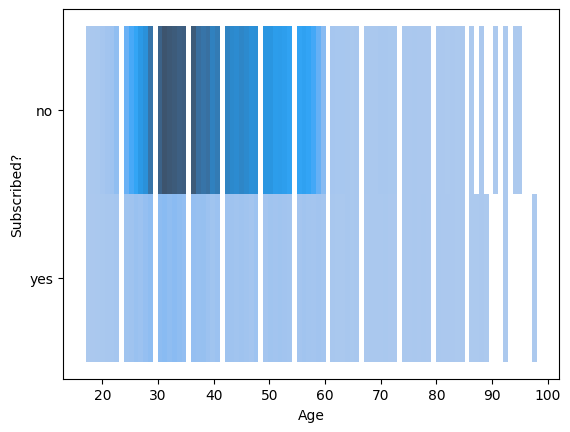

In [7]:
sns.histplot(x = df['Age'], y = df['Subscribed?'])

Looks like we can sense a little trend here - those in the 30-45 age range seem to not plan on subscribing to a term deposit. Let's get to know the spread of a few other features.

<AxesSubplot: xlabel='Days_Since_Last_Contact'>

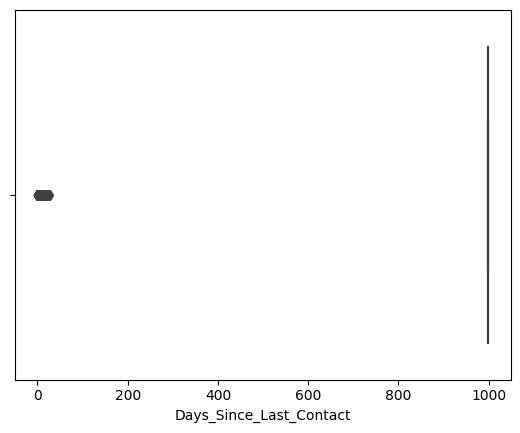

In [8]:
sns.boxplot(x = df['Days_Since_Last_Contact'])

This is a little concerning! It looks like nearly all of the data points are found at 999, a value I assume implies that the client hasn't been contacted. Given that there are nearly 42,000 points of data, I would like to see if the number of clients that were contacted recently is significant enough to keep.

In [9]:
filtered_df = df[df['Days_Since_Last_Contact'] != 999]
count = filtered_df.shape[0]
count

1515

Okay that's a really small amount. In the grand scheme of things, this is an incredibly insignificant feature, so let's get rid of it!|

In [10]:
df.drop(columns = 'Days_Since_Last_Contact', inplace=True)

<AxesSubplot: xlabel='Employment_Variation_Rate'>

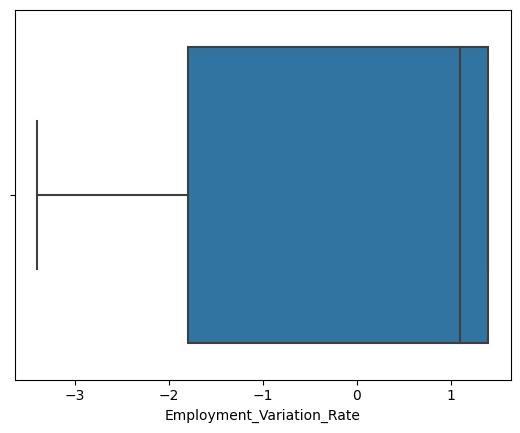

In [11]:
sns.boxplot(x = df['Employment_Variation_Rate'])

<AxesSubplot: xlabel='Consumer_Price_Index'>

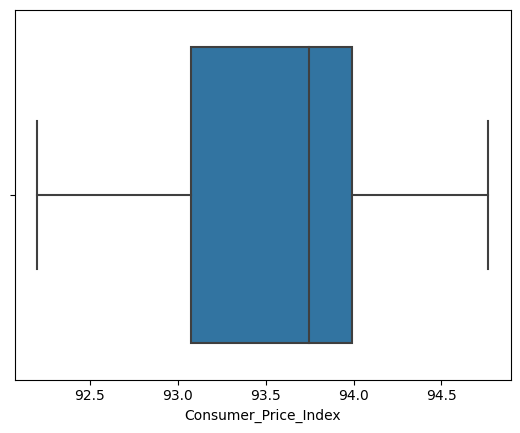

In [12]:
sns.boxplot(x = df['Consumer_Price_Index'])

<AxesSubplot: xlabel='Consumer_Confidence_Index'>

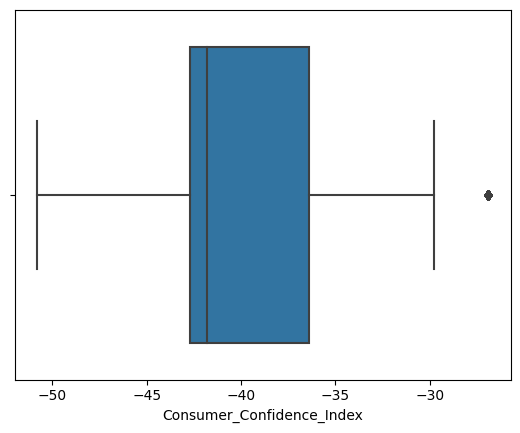

In [13]:
sns.boxplot(x = df['Consumer_Confidence_Index'])

In [14]:
filtered_df = df[df['Consumer_Confidence_Index'] > -30]
count = filtered_df.shape[0]
count

714

Looks like we've got some outliers here. We'll address them later on.

<AxesSubplot: xlabel='Euribor_3M_Rate'>

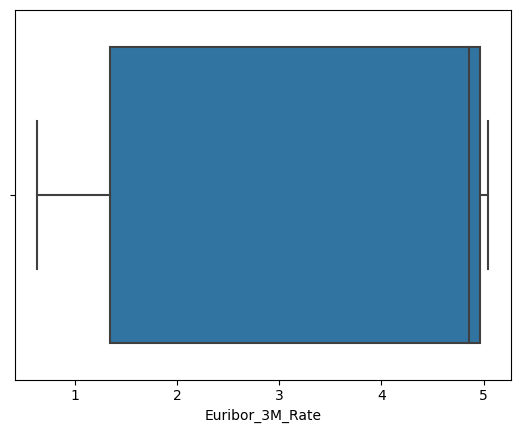

In [15]:
sns.boxplot(x = df['Euribor_3M_Rate'])

<AxesSubplot: xlabel='Num_Employees'>

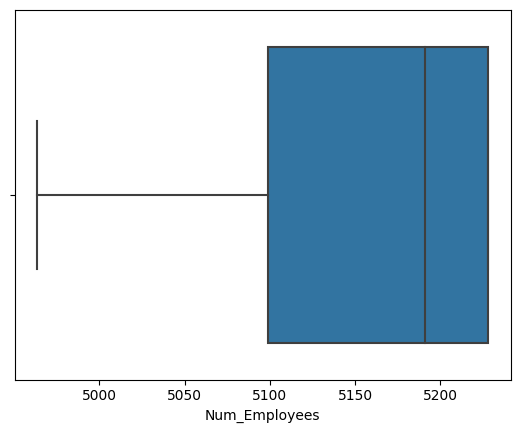

In [16]:
sns.boxplot(x = df['Num_Employees'])

## Data Cleaning

Time to clean the data and get a closer look! After getting a look at the columns of the data, I have a better understanding of what kind of information is being fed into the model. I suspect that some of the columns could potentially be removed for redundancy. To check if columns have varying data, I use .unique(). To check for missing values, I use .isnull() and sum the missing values in each column. 

## Checking for Missing Values

In [17]:
#identifying missing data
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

Age                          0
Occupation                   0
Marital_Status               0
Education                    0
Client_credit_in_default?    0
Housing_Loan                 0
Personal_Loan                0
Contact_Form                 0
Contact_Month                0
Contact_Day_of_Week          0
Duration_of_Contact          0
Num_Contact                  0
Total_Num_Contact            0
Outcome_of_Campaign          0
Employment_Variation_Rate    0
Consumer_Price_Index         0
Consumer_Confidence_Index    0
Euribor_3M_Rate              0
Num_Employees                0
Subscribed?                  0
dtype: int64

In [18]:
#checking to see if any of the columns have only one value input
for col in df.columns:
    if (len(list(df[col].unique())) <= 1):
        print(col)

Just to double check if any columns have missing values, I investigated columns that are more likely to have missing data, like information about education or marital status

In [19]:
print(df['Education'].isnull().values.any())
print(df['Marital_Status'].isnull().values.any())

False
False


In [20]:
#checking the column types
col = df.columns
col_types = df[col].dtypes
col_types

Age                            int64
Occupation                    object
Marital_Status                object
Education                     object
Client_credit_in_default?     object
Housing_Loan                  object
Personal_Loan                 object
Contact_Form                  object
Contact_Month                 object
Contact_Day_of_Week           object
Duration_of_Contact            int64
Num_Contact                    int64
Total_Num_Contact              int64
Outcome_of_Campaign           object
Employment_Variation_Rate    float64
Consumer_Price_Index         float64
Consumer_Confidence_Index    float64
Euribor_3M_Rate              float64
Num_Employees                float64
Subscribed?                   object
dtype: object

There's a few features that require one-hot-encoding, so we'll investigate the various answers on all the 'object' columns first.

In [21]:
#summary of the dataframe
df_summ = df.describe(include = 'all')
df_summ

,Age,Occupation,Marital_Status,Education,Client_credit_in_default?,Housing_Loan,Personal_Loan,Contact_Form,Contact_Month,Contact_Day_of_Week,Duration_of_Contact,Num_Contact,Total_Num_Contact,Outcome_of_Campaign,Employment_Variation_Rate,Consumer_Price_Index,Consumer_Confidence_Index,Euribor_3M_Rate,Num_Employees,Subscribed?
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


From the summary, we can deduce that all the object columns have an appropriate number of unique answers for us to one-hot encode. Note: there is a section that is concealed with ellipses, but the column we can't see is duration, which is a numberical column already, and does not requite one-hot encoding.

Upon closer analysis, I noticed that 36548/41188 data points were labeled as no, which means nearly 90% of all the data is labeled one way in a binary classification problem. ultimately, this may lead to some issues down the line with assessing the model's performance through the accuracy score, so I'll include ROC and AUC curves in the analysis.

It looks like there are some unknown values among the features that maybe didn't pop up as NaN (binary with 3 options and such.) Let's address them.

In [22]:
df['Housing_Loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [23]:
#I'm not sure which other features have unknown as an option. Let's check!
columns_with_unknown = [col for col in df.columns if 'unknown' in df[col].unique()]
columns_with_unknown

/tmp/ipykernel_1550/193035793.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  columns_with_unknown = [col for col in df.columns if 'unknown' in df[col].unique()]


['Occupation',
 'Marital_Status',
 'Education',
 'Client_credit_in_default?',
 'Housing_Loan',
 'Personal_Loan']

Okay, know that we have all the columns with unknown values, it's time to comb through a column for all the rows containing 'unknown'

In [24]:
filtered_Education = df[df['Education'] == 'unknown']
filtered_Education

,Age,Occupation,Marital_Status,Education,Client_credit_in_default?,Housing_Loan,Personal_Loan,Contact_Form,Contact_Month,Contact_Day_of_Week,Duration_of_Contact,Num_Contact,Total_Num_Contact,Outcome_of_Campaign,Employment_Variation_Rate,Consumer_Price_Index,Consumer_Confidence_Index,Euribor_3M_Rate,Num_Employees,Subscribed?
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,55,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,59,technician,married,unknown,no,yes,no,telephone,may,mon,93,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30,46,admin.,married,unknown,no,no,no,telephone,may,mon,348,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,386,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,unknown,no,yes,no,cellular,nov,tue,162,2,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41120,60,admin.,married,unknown,no,no,no,cellular,nov,tue,333,2,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,985,3,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,unknown,no,yes,no,cellular,nov,thu,222,1,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


In [25]:
#Yikes! That looks like a lot, so let's check how many are unknown to determine if this feature is even
#helpful for our model.
num_unknowns_Education = (filtered_Education == 'unknown').sum().sum()
num_unknowns_Education

2499

Alright, 2,499 isn't too bad out of ~41,000 samples. One possible route is turning the education levels into numeric values and finding the average of the data, replacing each 'unknown' with the average value. But let's return to the context of the problem - we are trying to determine if a customer is likely to subscribe to a term deposit or not. If a customer's education is unknown, it could be for a variety of reasons - perhaps they wouldn't like to share too much personal information, or they believe that their education level is irrelevant to the financial services they would like. Either way, the lack of information might actually provide *more* insight into what the client prioritizes, or their spending habits.

In [26]:
#Ultimately, I'm going to keep unknown under the personal features - occupation, marital_status, and education. Let's
#double check that there aren't too many unknowns in the occupation and marital_status features.
filtered_Occupation = df[df['Occupation'] == 'unknown']
num_unknowns_Occupation = (filtered_Occupation == 'unknown').sum().sum()
print(num_unknowns_Occupation)

filtered_Marital = df[df['Marital_Status'] == 'unknown']
num_unknowns_Marital = (filtered_Marital == 'unknown').sum().sum()
print(num_unknowns_Marital)

632
111


Now it's time to take a closer look at the unknown values in the more technical data - whether a client's credit is in default, if they have a housing loan, and if they have a personal loan. These are all values that are key to determining if a client is likely to subscribe to a term deposit.

In [27]:
#First, lets take a look at the volume of unknowns
filtered_Default = df[df['Client_credit_in_default?'] == 'unknown']
num_unknowns_Default = (filtered_Default == 'unknown').sum().sum()
print(num_unknowns_Default)

filtered_Housing = df[df['Housing_Loan'] == 'unknown']
num_unknowns_Housing = (filtered_Housing == 'unknown').sum().sum()
print(num_unknowns_Housing)

filtered_Personal = df[df['Personal_Loan'] == 'unknown']
num_unknowns_Personal = (filtered_Personal == 'unknown').sum().sum()
print(num_unknowns_Personal)

9762
2253
2253


Okay, that's not ideal. Given that these features are binary and I'm not willing to build an entire model to predict if someone's in credit default, I think it would be wiser to leave the values as unknown in the interest of time. While turning the "yes" and "no"s into 0s and 1s could be beneficial for finding an average, the classification should be binary - you can't have a customer that is 0.63 in credit default. They either are or they aren't. So, I've ultimately decided to leave in all the unknowns.

## One-Hot Encoding

Before I one-hot encode all the other values, I want to maintain a consistent capitalization across the dataframe. Let's replace the object values with a capitalized version of themselves.

In [28]:
df['Contact_Month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [29]:
df['Contact_Month'] = df['Contact_Month'].str.capitalize()
df['Contact_Month'].unique()

array(['May', 'Jun', 'Jul', 'Aug', 'Oct', 'Nov', 'Dec', 'Mar', 'Apr',
       'Sep'], dtype=object)

In [30]:
df['Occupation'] = df['Occupation'].str.capitalize()
df['Marital_Status'] = df['Marital_Status'].str.capitalize()
df['Education'] = df['Education'].str.capitalize()
df['Client_credit_in_default?'] = df['Client_credit_in_default?'].str.capitalize()
df['Housing_Loan'] = df['Housing_Loan'].str.capitalize()
df['Personal_Loan'] = df['Personal_Loan'].str.capitalize()
df['Education'] = df['Education'].str.capitalize()
df['Contact_Form'] = df['Contact_Form'].str.capitalize()
df['Contact_Day_of_Week'] = df['Contact_Day_of_Week'].str.capitalize()
df['Education'] = df['Education'].str.capitalize()
df['Outcome_of_Campaign'] = df['Outcome_of_Campaign'].str.capitalize()
df['Subscribed?'] = df['Subscribed?'].str.capitalize()

In [31]:
#Time for one-hot encoding.
#Making new columns for the different answers for the Occupation feature
df_Occupation = pd.get_dummies(df['Occupation'], prefix='Occupation_')
df_Occupation

,Occupation__Admin.,Occupation__Blue-collar,Occupation__Entrepreneur,Occupation__Housemaid,Occupation__Management,Occupation__Retired,Occupation__Self-employed,Occupation__Services,Occupation__Student,Occupation__Technician,Occupation__Unemployed,Occupation__Unknown
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,0,0
41184,0,1,0,0,0,0,0,0,0,0,0,0
41185,0,0,0,0,0,1,0,0,0,0,0,0
41186,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
#now let's replace the original job column in the dataframe
df = df.join(df_Occupation)
df.drop(columns = 'Occupation', inplace=True)
#checking...
df.columns

Index(['Age', 'Marital_Status', 'Education', 'Client_credit_in_default?',
       'Housing_Loan', 'Personal_Loan', 'Contact_Form', 'Contact_Month',
       'Contact_Day_of_Week', 'Duration_of_Contact', 'Num_Contact',
       'Total_Num_Contact', 'Outcome_of_Campaign', 'Employment_Variation_Rate',
       'Consumer_Price_Index', 'Consumer_Confidence_Index', 'Euribor_3M_Rate',
       'Num_Employees', 'Subscribed?', 'Occupation__Admin.',
       'Occupation__Blue-collar', 'Occupation__Entrepreneur',
       'Occupation__Housemaid', 'Occupation__Management',
       'Occupation__Retired', 'Occupation__Self-employed',
       'Occupation__Services', 'Occupation__Student', 'Occupation__Technician',
       'Occupation__Unemployed', 'Occupation__Unknown'],
      dtype='object')

Worked great! Now, I'm going to do this with the rest of the object columns.

In [33]:
#marital column
df_marital = pd.get_dummies(df['Marital_Status'], prefix='Marital_')
df = df.join(df_marital)
df.drop(columns = 'Marital_Status', inplace=True)

#education column
df_education = pd.get_dummies(df['Education'], prefix='Education_')
df = df.join(df_education)
df.drop(columns = 'Education', inplace=True)

#default column
df_default = pd.get_dummies(df['Client_credit_in_default?'], prefix='Default_')
df = df.join(df_default)
df.drop(columns = 'Client_credit_in_default?', inplace=True)

#housing column
df_housing = pd.get_dummies(df['Housing_Loan'], prefix='Housing_Loan_')
df = df.join(df_housing)
df.drop(columns = 'Housing_Loan', inplace=True)

#loan column
df_loan = pd.get_dummies(df['Personal_Loan'], prefix='Personal_Loan_')
df = df.join(df_loan)
df.drop(columns = 'Personal_Loan', inplace=True)

#contact type column
df_contact = pd.get_dummies(df['Contact_Form'], prefix='Contact_Form_')
df = df.join(df_contact)
df.drop(columns = 'Contact_Form', inplace=True)

#month column
df_month = pd.get_dummies(df['Contact_Month'])
df = df.join(df_month)
df.drop(columns = 'Contact_Month', inplace=True)

#day_of_week column
df_day_of_week = pd.get_dummies(df['Contact_Day_of_Week'])
df = df.join(df_day_of_week)
df.drop(columns = 'Contact_Day_of_Week', inplace=True)

#poutcome column
df_poutcome = pd.get_dummies(df['Outcome_of_Campaign'], prefix = 'Outcome_')
df = df.join(df_poutcome)
df.drop(columns = 'Outcome_of_Campaign', inplace=True)

In [34]:
df.columns

Index(['Age', 'Duration_of_Contact', 'Num_Contact', 'Total_Num_Contact',
       'Employment_Variation_Rate', 'Consumer_Price_Index',
       'Consumer_Confidence_Index', 'Euribor_3M_Rate', 'Num_Employees',
       'Subscribed?', 'Occupation__Admin.', 'Occupation__Blue-collar',
       'Occupation__Entrepreneur', 'Occupation__Housemaid',
       'Occupation__Management', 'Occupation__Retired',
       'Occupation__Self-employed', 'Occupation__Services',
       'Occupation__Student', 'Occupation__Technician',
       'Occupation__Unemployed', 'Occupation__Unknown', 'Marital__Divorced',
       'Marital__Married', 'Marital__Single', 'Marital__Unknown',
       'Education__Basic.4y', 'Education__Basic.6y', 'Education__Basic.9y',
       'Education__High.school', 'Education__Illiterate',
       'Education__Professional.course', 'Education__University.degree',
       'Education__Unknown', 'Default__No', 'Default__Unknown', 'Default__Yes',
       'Housing_Loan__No', 'Housing_Loan__Unknown', 'Housing_L

Note how I didn't complete one-hot encoding for binary columns like contact method and the label. For these columns, we'll just convert to 1s and 0s.

In [35]:
replacement_dict = {'Yes': 1, 'No': 0}
df['Subscribed?'] = df['Subscribed?'].replace(replacement_dict)
df['Subscribed?'].unique()

array([0, 1])

In [36]:
#checking the column types
col = df.columns
col_types = df[col].dtypes
print(col)
list(col_types)

Index(['Age', 'Duration_of_Contact', 'Num_Contact', 'Total_Num_Contact',
       'Employment_Variation_Rate', 'Consumer_Price_Index',
       'Consumer_Confidence_Index', 'Euribor_3M_Rate', 'Num_Employees',
       'Subscribed?', 'Occupation__Admin.', 'Occupation__Blue-collar',
       'Occupation__Entrepreneur', 'Occupation__Housemaid',
       'Occupation__Management', 'Occupation__Retired',
       'Occupation__Self-employed', 'Occupation__Services',
       'Occupation__Student', 'Occupation__Technician',
       'Occupation__Unemployed', 'Occupation__Unknown', 'Marital__Divorced',
       'Marital__Married', 'Marital__Single', 'Marital__Unknown',
       'Education__Basic.4y', 'Education__Basic.6y', 'Education__Basic.9y',
       'Education__High.school', 'Education__Illiterate',
       'Education__Professional.course', 'Education__University.degree',
       'Education__Unknown', 'Default__No', 'Default__Unknown', 'Default__Yes',
       'Housing_Loan__No', 'Housing_Loan__Unknown', 'Housing_L

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dty

Alright, everything's numerical now! Time to take a closer look into our outliers

## Outliers

In [37]:
import scipy.stats as stats

Earlier, we found that the only column that had outliers we might remove was the Consumer_Confidence_Index column. Let's take another look at how many outliers we found, and where they were.

<AxesSubplot: xlabel='Consumer_Confidence_Index'>

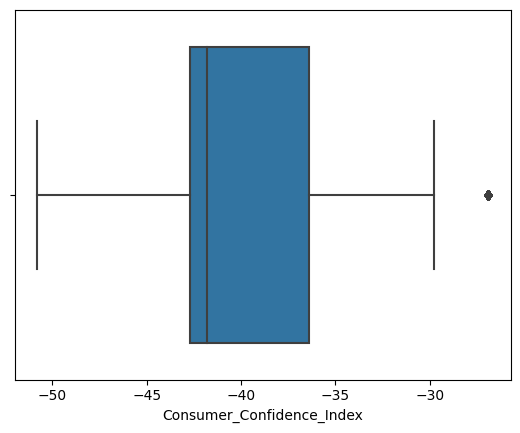

In [38]:
sns.boxplot(x = df['Consumer_Confidence_Index'])

In [39]:
filtered_df = df[df['Consumer_Confidence_Index'] > -30]
count = filtered_df.shape[0]
count

714

In [40]:
df.drop(df[df['Consumer_Confidence_Index'] > -30].index, inplace=True)

In [41]:
filtered_df = df[df['Consumer_Confidence_Index'] > -30]
count = filtered_df.shape[0]
count

0

Alright, all the outliers have removed, time to see how our model's performance is!

Looking at the data right now, it looks like most columns that are numerical have very consistent numbers, and not many outliers (i.e. 75th percentile = max). For the columns that do seem to have pretty far out values, they are held under points that are pretty important - for instance, the Consumer_Confidence_Index would have a large impact on the model's predictability, as it shows how confident the client is that products from the bank like the term deposit would benefit them. So I'll keep these for now.

Now, we have a new feature list. None of the features were removed, but there were quite a few that required one-hot encoding in order to become interpretable to the model. The only notable aspect of the data was that there was a massive difference in the data points that are labeled "no" vs. "yes" if the client will subscribe to a term deposit or not. This will likely impact the accuracy of the models, so I'll assess performance using ROC and AUC.

Before anything, I went through and cleaned up how the labels looked. Next, I checked for any missing values - through this process, I realized that for all the columns, maintaining the unknown values was more beneficial to the model, as a client that refuses to include such information probably would not want to subscribe to a term deposit. I utilized one-hot encoding to convert the object data type columns into numerical values the model could interpret. Additionally, I checked for any outliers, and didn't find any that were too wildly out of reach from the mean, and most that had max values that were different from the 75th percentile (or min values and 25th percentile) were ones where those values are vital to the model's predictability. Ultimately, I kept nearly everything.

The first model I would like to try is a logistic regression model, since it will spit out a probability that a client would subscribe to a term deposit, which is especially helpful, and it's also simple and interpretable. I would like to compare the performance of the logistic regression model with a decision tree and a random forest, since both DTs and RFs can handle non-linear relationships.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

## Logistic Regresssion Model

In [43]:
y = df['Subscribed?']
X = df.drop(columns = 'Subscribed?', axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1234)
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features: " + str(X.shape[1]))

Number of examples: 40474

Number of Features: 62


In [45]:
c_vals = {0.01, 0.1, 1, 10, 100}
acc_score_LR_list = []
l_loss_list = []

for c in c_vals:
    model = LogisticRegression(C = c, max_iter=10000)
    model.fit(X_train, y_train)
    
    probability_predictions = model.predict_proba(X_test)
    
    #df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
    #print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))
    
    l_loss = log_loss(y_test, probability_predictions)
    #print('Log loss: ' + str(l_loss))
    l_loss_list.append(l_loss)
    
    class_label_predictions = model.predict(X_test)
    
    acc_score_LR = accuracy_score(y_test, class_label_predictions)
    #print('Accuracy: ' + str(acc_score_LR))
    acc_score_LR_list.append(acc_score_LR)
print('List of Log Loss: ', l_loss_list)
print('List of Accuracy Scores: ', acc_score_LR_list)

List of Log Loss:  [0.19715177906916365, 0.19697915044375988, 0.19692012226649627, 0.19691091035718988, 0.19963650234968874]
List of Accuracy Scores:  [0.9157608695652174, 0.9157608695652174, 0.9157608695652174, 0.9155138339920948, 0.9147727272727273]


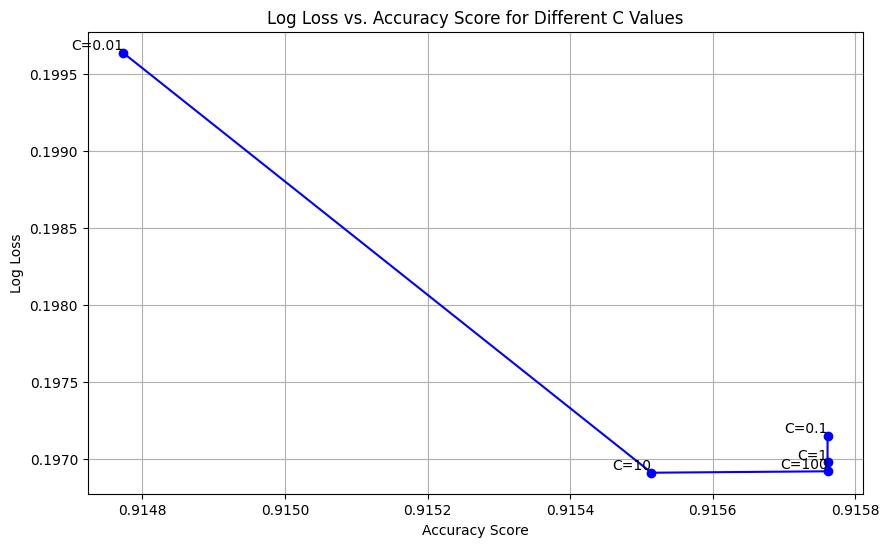

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(acc_score_LR_list, l_loss_list, marker='o', linestyle='-', color='b')

for i, c in enumerate(c_vals):
    plt.text(acc_score_LR_list[i], l_loss_list[i], f'C={c}', fontsize=10, ha='right',
             va='bottom', rotation = 0)

plt.ylabel('Log Loss')
plt.xlabel('Accuracy Score')
plt.title('Log Loss vs. Accuracy Score for Different C Values')
plt.grid(True)

plt.show()

Nice! Taking a closer look, it seems like a C value of 100 is ideal for our model - it has the highest accuracy score with the lowest loss. Now let's look into the max_iter value.

In [47]:
iter_vals = {8000, 10000, 15000, 20000}
acc_score_LR_list = []
l_loss_list = []

for iters in iter_vals:
    model = LogisticRegression(C = 100, max_iter = iters)
    model.fit(X_train, y_train)
    
    probability_predictions = model.predict_proba(X_test)
    
    #df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
    #print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))
    
    l_loss = log_loss(y_test, probability_predictions)
    #print('Log loss: ' + str(l_loss))
    l_loss_list.append(l_loss)
    
    class_label_predictions = model.predict(X_test)
    
    acc_score_LR = accuracy_score(y_test, class_label_predictions)
    #print('Accuracy: ' + str(acc_score_LR))
    acc_score_LR_list.append(acc_score_LR)
print('List of Log Loss: ', l_loss_list)
print('List of Accuracy Scores: ', acc_score_LR_list)

List of Log Loss:  [0.19692012226649627, 0.19692012226649627, 0.19692012226649627, 0.19692012226649627]
List of Accuracy Scores:  [0.9157608695652174, 0.9157608695652174, 0.9157608695652174, 0.9157608695652174]


We won't need a graph for this one - looks like max_iter had no impact on either accuracy or loss. Perfect! Time to regularize using L1 just in case there was any inadvertent overfitting caused by the large max_iter.

In [48]:
model = LogisticRegression(penalty='l1', solver='liblinear', C = 100, max_iter = 8000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_score_LR = accuracy_score(y_test, y_pred)
l_loss = log_loss(y_test, probability_predictions)
print('Loss:', l_loss)
print('Accuracy:', acc_score_LR)

Loss: 0.19692012226649627
Accuracy: 0.9157608695652174


Looks like conducting L1 regularization didn't do much to help, so good news - the model isn't very overfitted! Let's take a look at the ROC/AUC curves.

In [49]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [50]:
# Computing ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Computing AUC
roc_auc_LR = auc(fpr, tpr)
print('ROC AUC Score:', roc_auc_LR)

ROC AUC Score: 0.9401402816300405


Plotting ROC Curve...


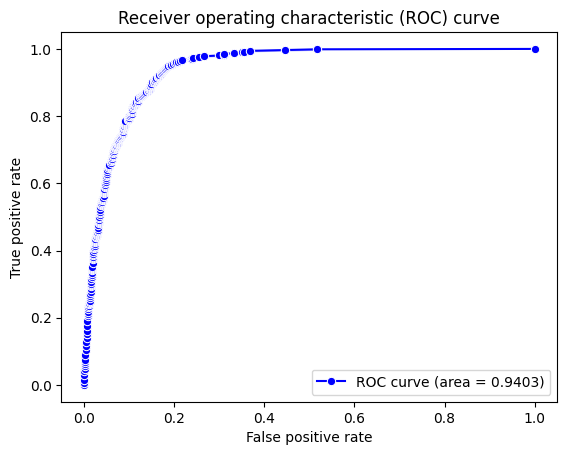

In [51]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x = fpr, y = tpr, color = 'b', marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['ROC curve (area = 0.9403)'])
plt.show()

The ROC curve looks great! Our Logistic Regression Model is proving to be a very good one.

In [52]:
print('Logistic Regression Model Performance:')
print('Accuracy Score: ', round(max(acc_score_LR_list), 5))
print('Log Loss', round(min(l_loss_list), 5))
print('AUC', round(roc_auc_LR, 5))

Logistic Regression Model Performance:
Accuracy Score:  0.91576
Log Loss 0.19692
AUC 0.94014


## Decision Tree

Time to make the Decision Tree model! For this one, we're going to run a Grid Search to determine the best estimator for both max_depth and min_samples_leaf.

In [53]:
md = [2**n for n in range(2,6)]
msl = [25*2**n for n in range(0,3)]
mss = [n for n in range(2,10)]
param_grid={'max_depth':md, 'min_samples_leaf':msl, 'min_samples_split': mss}

param_grid

{'max_depth': [4, 8, 16, 32],
 'min_samples_leaf': [25, 50, 100],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]}

In [54]:
print('Running Grid Search...')

model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid, cv=5)
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [55]:
best_md = grid_search.best_estimator_.max_depth
best_msl = grid_search.best_estimator_.min_samples_leaf
best_mss = grid_search.best_estimator_.min_samples_split

acc_score_DT = grid_search.best_score_

print('Best value for max depth: {0}'.format(best_md))
print('Best value for the minimum number of samples required to be at a leaf node: {0}'
      .format(best_msl))
print('Best value for the minimum number of samples required to split an internal node: {0}'
      .format(best_mss))

print('Accuracy score: {0}'.format(grid_search.best_score_))

Best value for max depth: 8
Best value for the minimum number of samples required to be at a leaf node: 50
Best value for the minimum number of samples required to split an internal node: 2
Accuracy score: 0.9164882397791498


I want to double check the model's stability using cross-validation, so let's check it out below:

In [56]:
model = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 50, min_samples_split = 2)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [57]:
# Computing ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Computing AUC
roc_auc_DT = auc(fpr, tpr)
print('ROC AUC Score:', roc_auc_DT)

ROC AUC Score: 0.9407330432706471


Plotting ROC Curve...


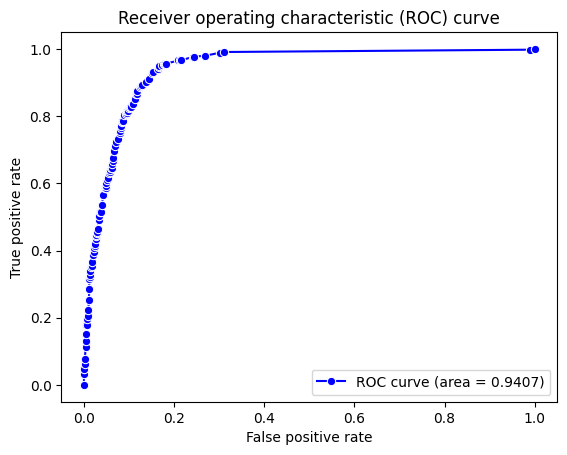

In [58]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x = fpr, y = tpr, color = 'b', marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['ROC curve (area = 0.9407)'])
plt.show()

Grabbing the accuracy score for the summary:

In [59]:
y_pred = model.predict(X_test)
acc_score_DT = accuracy_score(y_test, y_pred)

In [60]:
print('Decision Tree Model Performance:')
print('Accuracy Score: ', round(acc_score_DT, 5))
print('AUC', round(roc_auc_DT, 5))

Decision Tree Model Performance:
Accuracy Score:  0.91354
AUC 0.94073


## Random Forest Model

In [61]:
print('Begin Random Forest Implementation...')
model_RF = RandomForestClassifier(criterion='entropy', n_estimators=20)

model_RF.fit(X_train, y_train)

model_RF_preds = model_RF.predict_proba(X_test)
RF_20_predictions = list(model_RF_preds[:, -1])

model_RF_100 = RandomForestClassifier(criterion='entropy', n_estimators=100)

# 5. Fit the model to the training data 
model_RF_100.fit(X_train, y_train)

# 6. Make predictions on the test data using the predict_proba() method and 
# assign the result to a list named 'rf_100_predictions' 
model_RF_100_preds = model_RF_100.predict_proba(X_test)
RF_100_predictions = list(model_RF_100_preds[:, -1])

print('End')

Begin Random Forest Implementation...
End


In [62]:
print('Computing ROC Curve...')

# Use roc_curve to record fpr and tpr for rf_20_model
fpr_20, tpr_20, thresholds_20 = roc_curve(y_test, RF_20_predictions)

# Use roc_curve to record fpr and tpr for rf_100_model
fpr_100, tpr_100, thresholds_100 = roc_curve(y_test, RF_100_predictions)

print('End')

Computing ROC Curve...
End


Plotting ROC Curve...


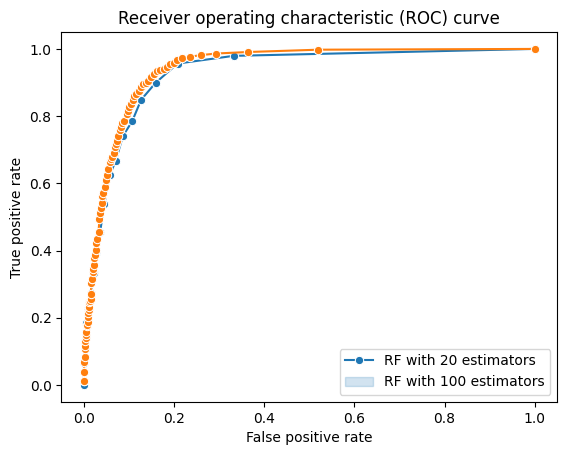

In [63]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x = fpr_20, y = tpr_20, marker = 'o')
sns.lineplot(x = fpr_100, y = tpr_100, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()

In [64]:
# AUC for RF_20_model
roc_auc_RF_20 = auc(fpr_20, tpr_20)
print("AUC of the RF model with 20 estimators is {:.3f}".format(roc_auc_RF_20))

# AUC for RF_100_model
roc_auc_RF_100 = auc(fpr_100, tpr_100)
print("AUC of the RF model with 100 estimators is {:.3f}".format(roc_auc_RF_100))

AUC of the RF model with 20 estimators is 0.928
AUC of the RF model with 100 estimators is 0.942


Looks like the AUC is slightly bigger with the random forest model that has 100 estimators. Let's get the acucracy score as well.

In [65]:
y_pred = model_RF_100.predict(X_test)
acc_score_RF = accuracy_score(y_test, y_pred)

In [66]:
print('Random Forest Model Performance:')
print('Accuracy Score: ', round(acc_score_RF, 5))
print('AUC', round(roc_auc_RF_100, 5))

Random Forest Model Performance:
Accuracy Score:  0.9128
AUC 0.942


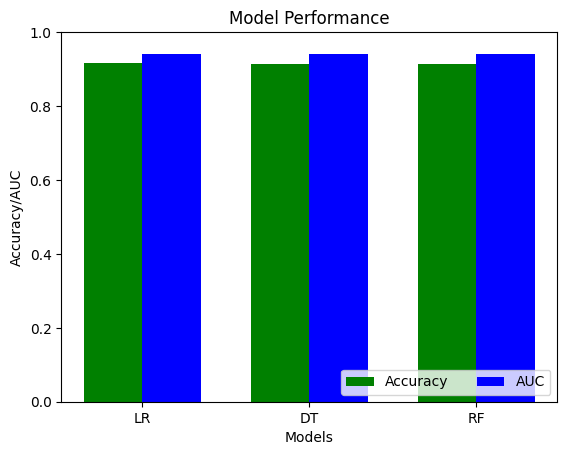

In [79]:
accuracy_scores = [acc_score_LR, acc_score_DT, acc_score_RF]
aucs = [roc_auc_LR, roc_auc_DT, roc_auc_RF_100]
size = np.arange(3)
width = 0.35

plt.bar(size, accuracy_scores, width, color = 'green', label = 'Accuracy')

plt.bar(size + width, aucs, width, color = 'blue', label = 'AUC')

labels = ['LR', 'DT', 'RF']
plt.xticks(size + width/2, labels)

plt.xlabel("Models")
plt.ylabel("Accuracy/AUC")

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc = 'lower right', ncol = 2)
plt.show()

Looks like the models all did fantastic! It seems that in this case, no model was particularly better than the other in terms of performance. Looking back on the time and effort I needed to put into each model, I think decision trees would be the most appropriate - it was simple, took little time to load, and it was easy to better understand the model's performance through the ROC curve! On the other hand, while logistic regression was well-suited for the problem, the process of determining the best c was a little hectic, and took quite a while to figure out. In the interest of time, I would avoid the logistic regression model. Finally, while random forest proved to perform very well, the difference between tis performance and the performance of logistic regression as decision trees wasn't significant enough to reason the pursuit of the model.

Ultimately, the models performed great in predicting if a customer would subscribe to a term deposit. For those few false positives, the bank could likely manage to afford a handful of extra calls, or may even be able to anticipate customers may need more persuasion. Overall, the analysis and performance of each model proved to be a helpful journey.